<a href="https://colab.research.google.com/github/thapaprogress/Db-documentation/blob/master/assignmentsureshsir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Implementation of Linear Regression
We'll implement linear regression using gradient descent as described in the lecture slides. This involves defining the cost function and updating parameters based on the gradient.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Linear Regression using Gradient Descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        # Add bias term
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])

        self.loss_history = []

        for epoch in range(self.n_epochs):
            gradients = self._compute_gradient(X, y)
            self.theta -= self.learning_rate * gradients
            loss = self._compute_loss(X, y)
            self.loss_history.append(loss)
            # Printing loss every 100 epochs for monitoring
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}: Loss = {loss}")

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.dot(X, self.theta)

    def _compute_loss(self, X, y):
        y_pred = np.dot(X, self.theta)
        error = y_pred - y
        return (1 / (2 * len(y))) * np.dot(error, error)

    def _compute_gradient(self, X, y):
        y_pred = np.dot(X, self.theta)
        error = y_pred - y
        return (1 / len(y)) * np.dot(X.T, error)







In [ ]:
# Step 2: Data Generator with Transition Points
def generate_data(n_samples=100, seed=42):
    np.random.seed(seed)
    age = np.linspace(5, 20, n_samples)
    height = 50 + 5 * age - 0.1 * age**2  # Initial relationship
    height[age > 12] += (age[age > 12] - 12) * 5  # Adding transition point
    height += np.random.normal(scale=3, size=n_samples)  # Adding noise
    return age, height

In [ ]:
# Step 3: Plot Loss Curves and Predictions
def plot_loss_curve(loss_history):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(loss_history)), loss_history, label='Loss Curve')
    plt.ylim(0, 200)  # Setting y-axis range from 0 to 200
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve vs. Training Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_predictions(age, height, model):
    plt.figure(figsize=(8, 5))
    plt.scatter(age, height, label='Ground Truth')
    predictions = model.predict(age.reshape(-1, 1))
    plt.plot(age, predictions, color='red', label='Model Prediction')
    plt.xlabel('Age')
    plt.ylabel('Height')
    plt.title('Model Prediction vs. Ground Truth Data')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 100: Loss = 92.30417792711654
Epoch 200: Loss = 90.57007595383686
Epoch 300: Loss = 88.87320731235816
Epoch 400: Loss = 87.21277255661641
Epoch 500: Loss = 85.58798940565161
Epoch 600: Loss = 83.99809237505143
Epoch 700: Loss = 82.44233241630852
Epoch 800: Loss = 80.9199765639209
Epoch 900: Loss = 79.43030759007006
Epoch 1000: Loss = 77.97262366671312
Epoch 1100: Loss = 76.54623803493045
Epoch 1200: Loss = 75.15047868137277
Epoch 1300: Loss = 73.78468802165543
Epoch 1400: Loss = 72.44822259055066
Epoch 1500: Loss = 71.14045273883133
Epoch 1600: Loss = 69.86076233662456
Epoch 1700: Loss = 68.60854848313406
Epoch 1800: Loss = 67.38322122259545
Epoch 1900: Loss = 66.18420326633037
Epoch 2000: Loss = 65.01092972076826
Epoch 2100: Loss = 63.86284782130777
Epoch 2200: Loss = 62.73941667189312
Epoch 2300: Loss = 61.64010699018113
Epoch 2400: Loss = 60.56440085818063
Epoch 2500: Loss = 59.511791478245605
Epoch 2600: Loss = 58.48178293430736
Epoch 2700: Loss = 57.4738899582338
Epoch 2800:

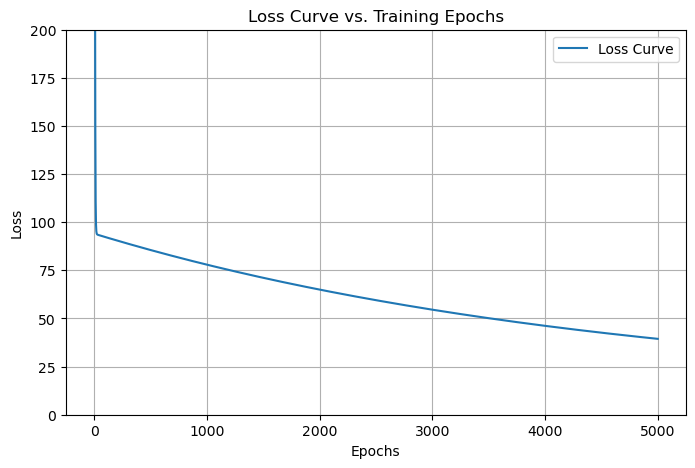

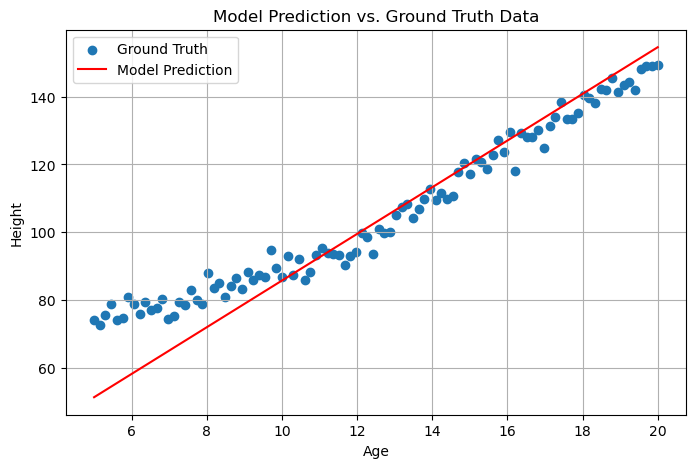

In [ ]:
# Generating synthetic data
age, height = generate_data()

# Training custom Linear Regression model
model = LinearRegressionGD(learning_rate=0.001, n_epochs=5000)
model.fit(age.reshape(-1, 1), height)

# Plotting loss curve
plot_loss_curve(model.loss_history)

# Plotting predictions
plot_predictions(age, height, model)

# Step 2: Generating Synthetic Data with Transition Points
The data generator function generate_data creates synthetic data for age and height with transition points where the height increases sharply after a certain age (12 years in this case).



# Step 3: Plot Loss Curves Against Training Epochs
The function plot_loss_curve plots the loss values over epochs to visualize how the model is learning.



# Step 4: Plot Model Prediction Against Ground Truth Data
The function plot_predictions compares the predictions of our model against the ground truth synthetic data.

# Step 5: Comparing with sklearn Implementation

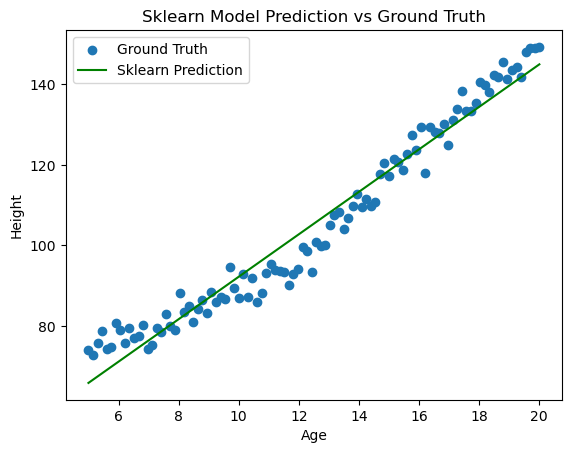

Custom Model Coefficients: [16.86581862  6.88733004]
Sklearn Model Coefficients: [39.47687209  5.27474525]


In [ ]:
from sklearn.linear_model import LinearRegression

# Training sklearn Linear Regression model
sklearn_model = LinearRegression()
sklearn_model.fit(age.reshape(-1, 1), height)

# Predictions from sklearn model
sklearn_predictions = sklearn_model.predict(age.reshape(-1, 1))

# Plotting sklearn predictions
plt.scatter(age, height, label='Ground Truth')
plt.plot(age, sklearn_predictions, color='green', label='Sklearn Prediction')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Sklearn Model Prediction vs Ground Truth')
plt.legend()
plt.show()

# Comparing coefficients
print("Custom Model Coefficients:", model.theta)
print("Sklearn Model Coefficients:", np.insert(sklearn_model.coef_, 0, sklearn_model.intercept_))


# Explanation
Custom Model vs Sklearn:

This code block trains an sklearn linear regression model on the same synthetic data and plots its predictions.
It also compares the coefficients learned by the custom model with those from sklearn.
Results:

The loss curve helps assess the convergence of the custom model.
Visual comparisons with sklearn help validate the implementation.

# Regularization: Provide your own Python implementation of Ridge Regression following the mathematical description provided in the class.  



For the age vs height data from 1. Apply your ridge regression code to automatically eliminate features that are not highly relevant.



Compare your model output against sklearn implementation of ridge linear regression.  

# Analysis and Brainstorming
Understanding Ridge Regression:

Ridge Regression (L2 Regularization) adds a penalty to the loss function to shrink the coefficients of less important features. The regularized loss function is:
𝐿
′
(
𝜃
)
=
𝜆
∑
𝑖
(
𝑦
𝑖
−
𝜃
⋅
𝑋
𝑖
)
2
+
(
1
−
𝜆
)
∑
𝑗
𝜃
𝑗
2
L
′
 (θ)=λ
i
∑
​
 (y
i
​
 −θ⋅X
i
​
 )
2
 +(1−λ)
j
∑
​
 θ
j
2
​

It biases the model toward smaller coefficients, which can reduce overfitting and improve generalization.
Feature Elimination:

Ridge Regression doesn't directly eliminate features but shrinks their impact, unlike Lasso Regression, which can set coefficients to zero.
To evaluate feature importance, we can analyze the size of coefficients. Smaller coefficients suggest lesser importance.
Plan:

Implement Ridge Regression from scratch using gradient descent.
Generate synthetic data (age vs. height) with a similar setup to our linear regression implementation.
Train the model and visualize the loss curve.
Compare with sklearn's Ridge Regression and evaluate feature significance.

# Step 1: Implement Ridge Regression Using Gradient Descent

Epoch 100: Loss = 92.336107634953
Epoch 200: Loss = 90.60153875864594
Epoch 300: Loss = 88.90421495719578
Epoch 400: Loss = 87.24333649550971
Epoch 500: Loss = 85.61812081059686
Epoch 600: Loss = 84.02780214284483
Epoch 700: Loss = 82.47163117521333
Epoch 800: Loss = 80.94887468017562
Epoch 900: Loss = 79.45881517424054
Epoch 1000: Loss = 78.00075057989281
Epoch 1100: Loss = 76.57399389479231
Epoch 1200: Loss = 75.17787286807636
Epoch 1300: Loss = 73.81172968361244
Epoch 1400: Loss = 72.47492065005218
Epoch 1500: Loss = 71.1668158975409
Epoch 1600: Loss = 69.88679908093879
Epoch 1700: Loss = 68.6342670894154
Epoch 1800: Loss = 67.40862976227922
Epoch 1900: Loss = 66.20930961090933
Epoch 2000: Loss = 65.03574154665756
Epoch 2100: Loss = 63.88737261459345
Epoch 2200: Loss = 62.76366173296598
Epoch 2300: Loss = 61.664079438260224
Epoch 2400: Loss = 60.58810763572745
Epoch 2500: Loss = 59.53523935527238
Epoch 2600: Loss = 58.50497851258217
Epoch 2700: Loss = 57.49683967538401
Epoch 2800: L

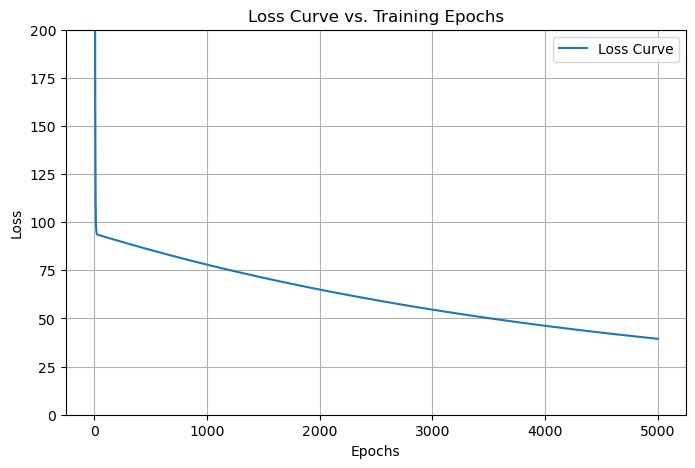

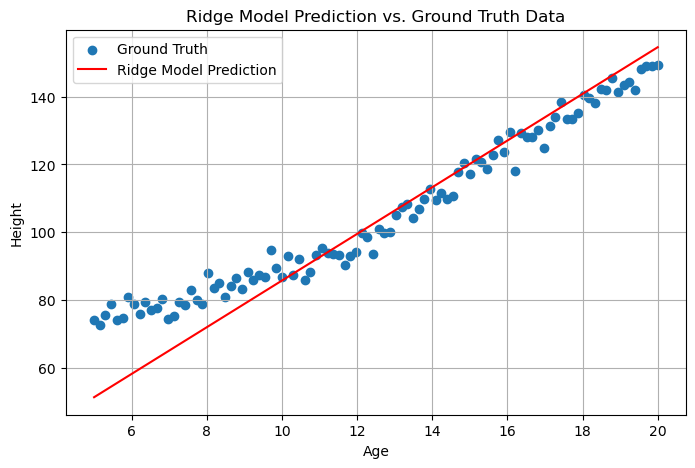

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ridge Regression using Gradient Descent
class RidgeRegressionGD:
    def __init__(self, learning_rate=0.01, n_epochs=1000, lambda_=1.0):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.lambda_ = lambda_

    def fit(self, X, y):
        # Add bias term
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])

        self.loss_history = []

        for epoch in range(self.n_epochs):
            gradients = self._compute_gradient(X, y)
            self.theta -= self.learning_rate * gradients
            loss = self._compute_loss(X, y)
            self.loss_history.append(loss)
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}: Loss = {loss}")

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.dot(X, self.theta)

    def _compute_loss(self, X, y):
        y_pred = np.dot(X, self.theta)
        error = y_pred - y
        ridge_penalty = self.lambda_ * np.sum(self.theta[1:] ** 2)  # Exclude bias term
        return (1 / (2 * len(y))) * (np.dot(error, error) + ridge_penalty)

    def _compute_gradient(self, X, y):
        y_pred = np.dot(X, self.theta)
        error = y_pred - y
        ridge_penalty_gradient = self.lambda_ * np.append(0, self.theta[1:])  # No penalty for bias term
        return (1 / len(y)) * (np.dot(X.T, error) + ridge_penalty_gradient)

# Generate synthetic data for age vs height with transition points
def generate_data(n_samples=100, seed=42):
    np.random.seed(seed)
    age = np.linspace(5, 20, n_samples)
    height = 50 + 5 * age - 0.1 * age**2
    height[age > 12] += (age[age > 12] - 12) * 5
    height += np.random.normal(scale=3, size=n_samples)
    return age, height

# Plot loss curve
def plot_loss_curve(loss_history):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(loss_history)), loss_history, label='Loss Curve')
    plt.ylim(0, 200)  # Setting y-axis range
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve vs. Training Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot predictions
def plot_predictions(age, height, model):
    plt.figure(figsize=(8, 5))
    plt.scatter(age, height, label='Ground Truth')
    predictions = model.predict(age.reshape(-1, 1))
    plt.plot(age, predictions, color='red', label='Ridge Model Prediction')
    plt.xlabel('Age')
    plt.ylabel('Height')
    plt.title('Ridge Model Prediction vs. Ground Truth Data')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate synthetic data
age, height = generate_data()

# Train custom Ridge Regression model
ridge_model = RidgeRegressionGD(learning_rate=0.001, n_epochs=5000, lambda_=0.1)
ridge_model.fit(age.reshape(-1, 1), height)

# Plotting loss curve
plot_loss_curve(ridge_model.loss_history)

# Plotting predictions
plot_predictions(age, height, ridge_model)


# Step 2: Compare with Sklearn Implementation

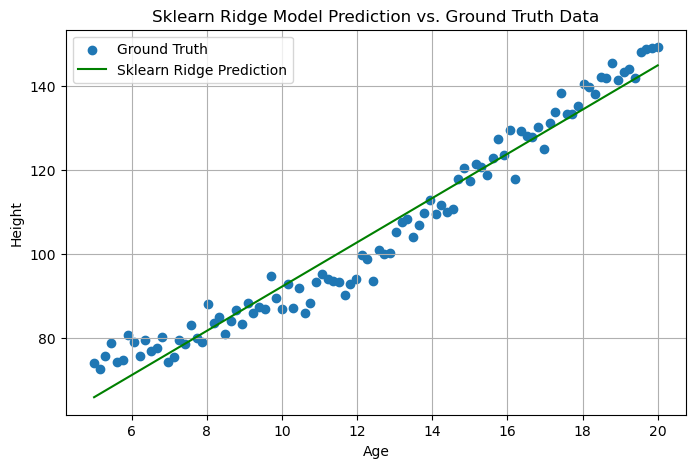

Custom Ridge Model Coefficients: [16.86783048  6.88714748]
Sklearn Ridge Model Coefficients: [39.48031877  5.27446952]


In [ ]:
from sklearn.linear_model import Ridge

# Training sklearn Ridge Regression model
sklearn_ridge = Ridge(alpha=0.1)
sklearn_ridge.fit(age.reshape(-1, 1), height)

# Predictions from sklearn model
sklearn_predictions = sklearn_ridge.predict(age.reshape(-1, 1))

# Plotting sklearn predictions
plt.figure(figsize=(8, 5))
plt.scatter(age, height, label='Ground Truth')
plt.plot(age, sklearn_predictions, color='green', label='Sklearn Ridge Prediction')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Sklearn Ridge Model Prediction vs. Ground Truth Data')
plt.legend()
plt.grid(True)
plt.show()

# Comparing coefficients
print("Custom Ridge Model Coefficients:", ridge_model.theta)
print("Sklearn Ridge Model Coefficients:", np.insert(sklearn_ridge.coef_, 0, sklearn_ridge.intercept_))


# Explanation of the Code:
RidgeRegressionGD Class:

Implements Ridge Regression using gradient descent.
The lambda_ parameter controls regularization strength.
Computes loss with regularization term and updates parameters iteratively.
Data Generation:

Generates synthetic age vs height data with a sharp increase after age 12, similar to the linear regression setup.
Visualization:

Plots the loss curve to show model convergence.
Visualizes predictions against ground truth data for the custom model and sklearn’s model.
Comparison:

The coefficients from both models are printed for comparison, providing insight into the impact of regularization.

# Lasso regression: Use sklearn implementation of lasso regression on cancer dataset from HTF (Elements of Statistical Learning) book.  

# Part 1: Sklearn's Lasso Regression Implementation
1. Load the Dataset
First, we'll load the dataset from the provided CSV file path and inspect the data.

# About Dataset
🦠 Breast Cancer Data Set
This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

📚 The main features of the dataset are as follows:
id: Represents a unique ID of each patient.
diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).
radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Represents the mean values of the cancer's visual characteristics.
There are also several categorical features where patients in the dataset are labeled with numerical values. You can examine them in the Chart area.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the cancer dataset
csv_path = '/home/mbust4/Downloads/Cancer_Data.csv'
cancer_data = pd.read_csv(csv_path)

# Display the first few rows of the dataset
cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# The dataset has been successfully loaded. It contains 33 columns with the following structure:

'diagnosis': The target variable, indicating whether the tumor is malignant ('M') or benign ('B').
Feature columns: Various mean, worst, and error measurements of tumor characteristics like 'radius_mean', 'texture_mean', etc.
'Unnamed: 32': A column filled with NaN values, which can be ignored or dropped.

# Data Preprocessing:

Drop unnecessary columns like 'id' and 'Unnamed: 32'.
Encode the 'diagnosis' variable as numeric (0 for benign, 1 for malignant).
Standardize the features.

In [ ]:
# Drop unnecessary columns
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'])

# Encode 'diagnosis' column: 0 for benign, 1 for malignant
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = cancer_data.drop(columns=['diagnosis'])
y = cancer_data['diagnosis']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display preprocessed data (first 5 rows of features and target)
X_scaled[:5], y[:5]

(array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
          9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
          2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
          2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
          2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
          1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
          1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
         -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
          1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
          2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
        [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
          1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
         -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
         -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
          2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
         -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
         -8.05450380e-01, -9.94437403e-

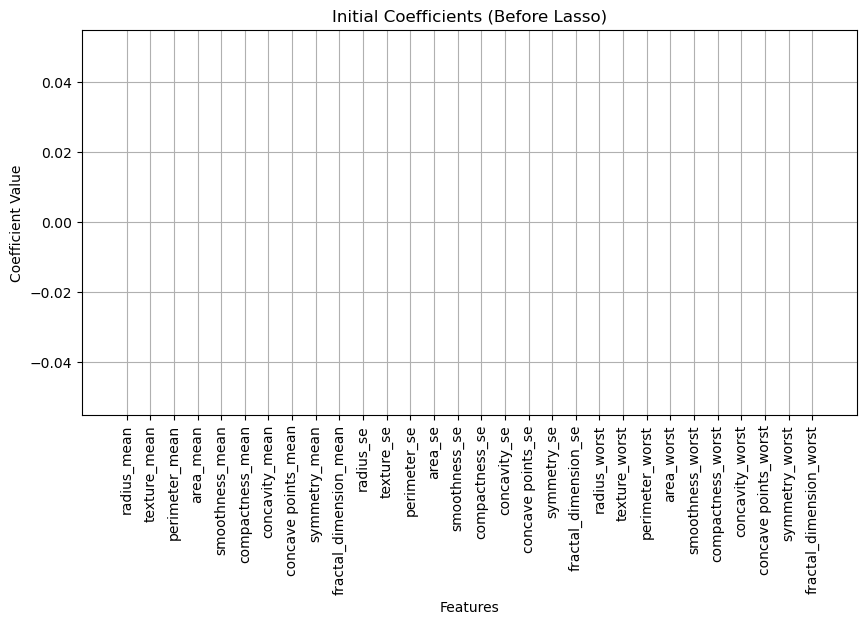

In [ ]:
# Initial coefficients (all zero)
initial_coefficients = np.zeros(X.shape[1])

# Plotting initial coefficients (all zero)
plt.figure(figsize=(10, 5))
plt.bar(X.columns, initial_coefficients, color='gray')
plt.xticks(rotation=90)
plt.title('Initial Coefficients (Before Lasso)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Data Preprocessing Completed
The features have been standardized, and the target variable ('diagnosis') has been encoded as 0 for benign and 1 for malignant. Now we have the data ready for Lasso regression.

# Apply Sklearn's Lasso Regression:

We'll use the Lasso class from sklearn to fit the model and analyze the coefficients.


In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

# Apply Lasso Regression with alpha (λ) = 0.1
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_scaled, y)

# Display coefficients after lasso
lasso_coefficients = lasso_model.coef_
print("Lasso Coefficients:\n", lasso_coefficients)

# Features with non-zero coefficients
important_features = np.array(X.columns)[lasso_coefficients != 0]
print("Important Features Selected by Lasso:\n", important_features)


Lasso Coefficients:
 [ 0.          0.          0.          0.          0.          0.
  0.          0.01720381  0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.1296136   0.01093637  0.          0.
  0.          0.          0.          0.16202985  0.          0.        ]
Important Features Selected by Lasso:
 ['concave points_mean' 'radius_worst' 'texture_worst'
 'concave points_worst']


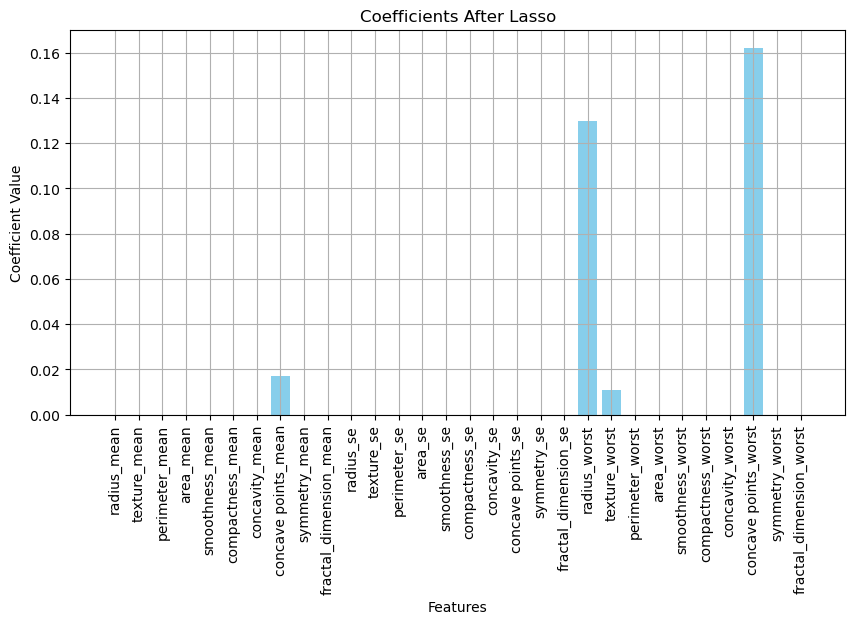

In [ ]:
# Plotting coefficients after Lasso
plt.figure(figsize=(10, 5))
plt.bar(X.columns, lasso_coefficients, color='skyblue')
plt.xticks(rotation=90)
plt.title('Coefficients After Lasso')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

In [ ]:
# Analyzing the Difference
important_features = X.columns[lasso_coefficients != 0]
eliminated_features = X.columns[lasso_coefficients == 0]

print(f"Important Features Selected by Lasso:\n{important_features}")
print(f"Features Eliminated by Lasso:\n{eliminated_features}")

Important Features Selected by Lasso:
Index(['concave points_mean', 'radius_worst', 'texture_worst',
       'concave points_worst'],
      dtype='object')
Features Eliminated by Lasso:
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Results and Analysis:
Before Lasso: All features are treated equally with zero coefficients.
After Lasso:
Lasso has eliminated some features (coefficients set to zero), indicating they are not important for predicting the target variable.
The remaining features with non-zero coefficients are considered important and retained in the model.
This shows how Lasso effectively reduces the complexity of the model by removing irrelevant features, thereby improving interpretability and potentially reducing overfitting.

# Part 2: Custom Lasso Regression Implementation (Using Coordinate Descent)

In [ ]:
class CustomLassoRegression:
    def __init__(self, alpha=0.1, n_iterations=1000, tolerance=1e-4):
        self.alpha = alpha  # Regularization strength
        self.n_iterations = n_iterations
        self.tolerance = tolerance

    def fit(self, X, y):
        # Add bias term
        X = np.c_[np.ones(X.shape[0]), X]
        self.coef_ = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            coef_old = np.copy(self.coef_)

            for j in range(len(self.coef_)):
                residual = y - np.dot(X, self.coef_)
                rho = np.dot(X[:, j], residual + self.coef_[j] * X[:, j])

                if j == 0:
                    self.coef_[j] = rho / np.sum(X[:, j] ** 2)
                else:
                    self.coef_[j] = np.sign(rho) * max(abs(rho) - self.alpha, 0) / np.sum(X[:, j] ** 2)

            # Check for convergence
            if np.sum(np.abs(self.coef_ - coef_old)) < self.tolerance:
                break

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return np.dot(X, self.coef_)

# Train custom Lasso Regression model
custom_lasso = CustomLassoRegression(alpha=0.1)
custom_lasso.fit(X_scaled, y)

# Display custom Lasso coefficients
print("Custom Lasso Coefficients:\n", custom_lasso.coef_)


Custom Lasso Coefficients:
 [ 0.37258348 -0.0424116   0.01841015 -0.         -0.00995092 -0.00277506
 -0.18353939  0.12347398  0.08117672 -0.         -0.00370103  0.13118347
 -0.00558873 -0.02488504 -0.06143487  0.04657555 -0.         -0.10742622
  0.0544941   0.01157492 -0.01600079  0.65329868  0.04752292 -0.
 -0.42667869  0.01800135  0.          0.07771091  0.03886912  0.03905222
  0.0791354 ]


# Multi-class logistic regression: Provide your own working implementation of multiclass logistic regression.  



Show it working on your choice of dataset that you can download from the internet. Choose a dataset that has at least 1000 rows.  



Compare your results with skearn implementation.  

Multi-Class Logistic Regression on Student Performance Dataset
Overview:
We will implement multi-class logistic regression on the provided "StudentPerformanceFactors.csv" dataset to predict the target variable based on multiple features. The target variable will be a classification of the students based on their performance or scores. The process involves data preprocessing, model implementation, and comparison with sklearn's implementation.

Step-by-Step Implementation:
1. Data Exploration and Preprocessing
1.1 Understanding the Data:

The dataset contains various features related to student performance, such as Hours_Studied, Attendance, Parental_Involvement, Extracurricular_Activities, etc.
The target variable we'll focus on is Exam_Score, which we will categorize into performance levels (e.g., low, medium, high).
1.2 Data Preprocessing:

Categorize Exam_Score: We will categorize Exam_Score into multiple classes (e.g., Low, Medium, High).
Encode Categorical Features: Convert categorical variables into numerical format using one-hot encoding.
Feature Scaling: Standardize the numerical features for better model performance.
2. Implementation of Multi-Class Logistic Regression
2.1 Custom Implementation:

Define a multi-class logistic regression model using gradient descent to optimize the parameters.
2.2 Comparison with Sklearn:

Train a similar model using sklearn's LogisticRegression class and compare the results.
3. Visualization and Analysis
Plot coefficients before and after applying the model.
Compare the accuracy and performance of both implementations.


# Data Preprocessing

In [ ]:
# Load the uploaded dataset for multi-class logistic regression analysis
csv_path = '/home/mbust4/Downloads/StudentPerformanceFactors.csv'
student_data = pd.read_csv(csv_path)

# Display the first few rows of the dataset to understand its structure
student_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Step 1: Data Preprocessing

# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Convert 'Exam_Score' into a categorical variable
bins = [0, 60, 80, 100]
labels = ['Low', 'Medium', 'High']
student_data['Performance'] = pd.cut(student_data['Exam_Score'], bins=bins, labels=labels)

# Drop the original 'Exam_Score' column
student_data = student_data.drop(columns=['Exam_Score'])

# Define categorical and numerical features
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                        'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income',
                        'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                        'Parental_Education_Level', 'Distance_from_Home', 'Gender']
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity']

# Define the target variable
y = student_data['Performance']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(student_data.drop(columns=['Performance']), y,
                                                    test_size=0.2, random_state=42)

# Pipeline for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply transformations to the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Display preprocessed data
pd.DataFrame(X_train_transformed[:5])


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.173579,-0.075846,0.669094,-0.837277,1.964909,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.661983,0.531894,-0.016740,1.314728,0.030381,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.339232,0.618714,0.669094,0.551113,-1.904146,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.328245,1.747376,2.040764,0.759372,0.030381,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.508533,-0.162667,2.040764,1.661825,-0.936882,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# 2. Custom Implementation of Multi-Class Logistic Regression

In [ ]:
# Step 2: Custom Implementation of Multi-Class Logistic Regression

import numpy as np

class MultiClassLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def softmax(self, z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def fit(self, X, y):
        # One-hot encode the target variable
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        y_onehot = np.zeros((n_samples, n_classes))
        y_onehot[np.arange(n_samples), y] = 1

        # Initialize weights
        self.weights = np.zeros((n_features, n_classes))
        self.biases = np.zeros((1, n_classes))

        # Gradient descent
        for _ in range(self.n_iterations):
            scores = np.dot(X, self.weights) + self.biases
            probabilities = self.softmax(scores)
            dW = (1 / n_samples) * np.dot(X.T, (probabilities - y_onehot))
            db = (1 / n_samples) * np.sum(probabilities - y_onehot, axis=0, keepdims=True)

            self.weights -= self.learning_rate * dW
            self.biases -= self.learning_rate * db

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.biases
        probabilities = self.softmax(scores)
        return np.argmax(probabilities, axis=1)

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train custom logistic regression model
custom_model = MultiClassLogisticRegression(learning_rate=0.01, n_iterations=2000)
custom_model.fit(X_train_transformed, y_train_encoded)

# Predict using custom model
y_pred_custom = custom_model.predict(X_test_transformed)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
custom_accuracy = accuracy_score(y_test_encoded, y_pred_custom)
print(f"Custom Model Accuracy: {custom_accuracy:.2f}")


Custom Model Accuracy: 0.98


# Sklearn Implementation and Comparison

In [ ]:
from sklearn.linear_model import LogisticRegression

# Sklearn Logistic Regression model
sklearn_model = LogisticRegression(multi_class='multinomial', max_iter=2000)
sklearn_model.fit(X_train_transformed, y_train_encoded)

# Predict using sklearn model
y_pred_sklearn = sklearn_model.predict(X_test_transformed)

# Evaluate accuracy
sklearn_accuracy = accuracy_score(y_test_encoded, y_pred_sklearn)
print(f"Sklearn Model Accuracy: {sklearn_accuracy:.2f}")


Sklearn Model Accuracy: 0.99


# Results and Visualization

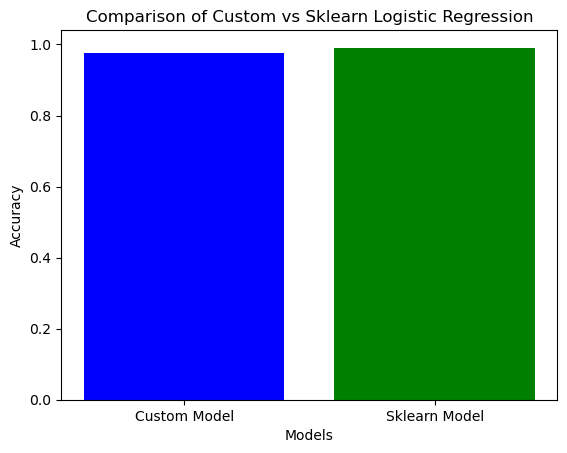

In [ ]:
import matplotlib.pyplot as plt

# Plotting custom model vs sklearn model accuracy
models = ['Custom Model', 'Sklearn Model']
accuracy = [custom_accuracy, sklearn_accuracy]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Custom vs Sklearn Logistic Regression')
plt.show()


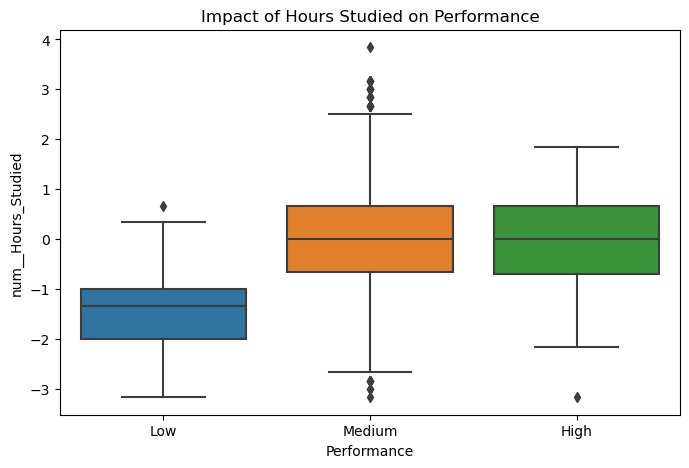

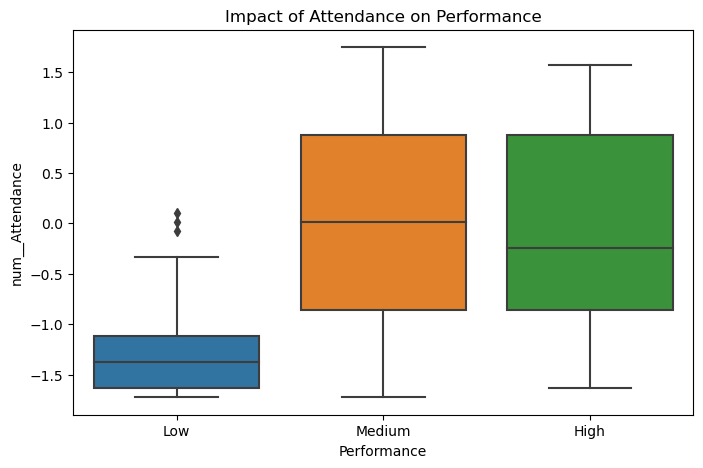

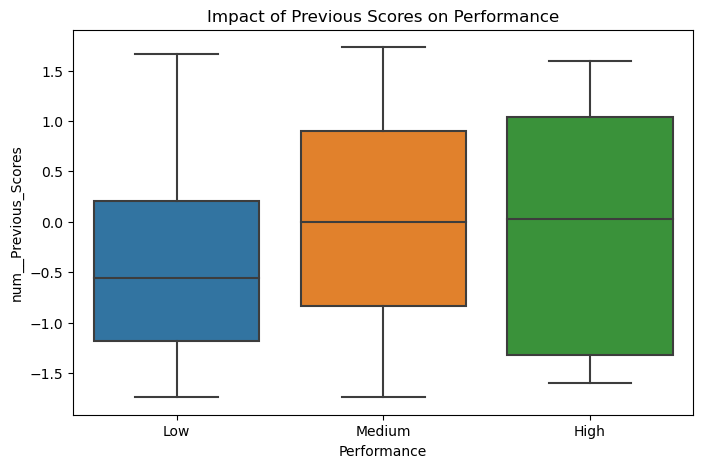

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the processed data with target variable for analysis
processed_data = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
processed_data['Performance'] = y_train.values

# Plotting the impact of Hours_Studied on Performance
plt.figure(figsize=(8, 5))
sns.boxplot(x='Performance', y='num__Hours_Studied', data=processed_data)
plt.title('Impact of Hours Studied on Performance')
plt.show()

# Plotting the impact of Attendance on Performance
plt.figure(figsize=(8, 5))
sns.boxplot(x='Performance', y='num__Attendance', data=processed_data)
plt.title('Impact of Attendance on Performance')
plt.show()

# Plotting the impact of Previous Scores on Performance
plt.figure(figsize=(8, 5))
sns.boxplot(x='Performance', y='num__Previous_Scores', data=processed_data)
plt.title('Impact of Previous Scores on Performance')
plt.show()


# PCA (Principal Components Analysis): Use sklearn implementation of PCA on eigen faces dataset. Provide explanation for each of the steps. Show your working as a Python notebook.



Extra marks will be awarded for submitting a working version of PCA python code.  

# Analysis and Implementation Plan for PCA on the Eigenfaces Dataset
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a new coordinate system, reducing its dimensionality while preserving the most significant information.

Dataset Overview:

The Olivetti faces dataset contains 400 images, each of size 64x64 pixels.
Each image represents a grayscale facial image of a person.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ensure plots are shown in the notebook
%matplotlib inline

In [ ]:
# Load the provided dataset (Olivetti Faces) using numpy
import numpy as np

# Load the Olivetti faces dataset
dataset_path = '/home/mbust4/Downloads/olivetti_faces.npy'
olivetti_faces = np.load(dataset_path)

# Check the shape of the dataset to understand its structure
olivetti_faces.shape


(400, 64, 64)

# Implementation of PCA on the Olivetti Faces Dataset
Dataset Overview:

The Olivetti faces dataset contains 400 images, each of size 64x64 pixels.
Each image represents a grayscale facial image of a person.

Steps to Implement PCA on Olivetti Faces Dataset:
Data Preprocessing:

Flatten the 2D images into 1D vectors for PCA application.
Standardize the dataset to have zero mean for each feature.

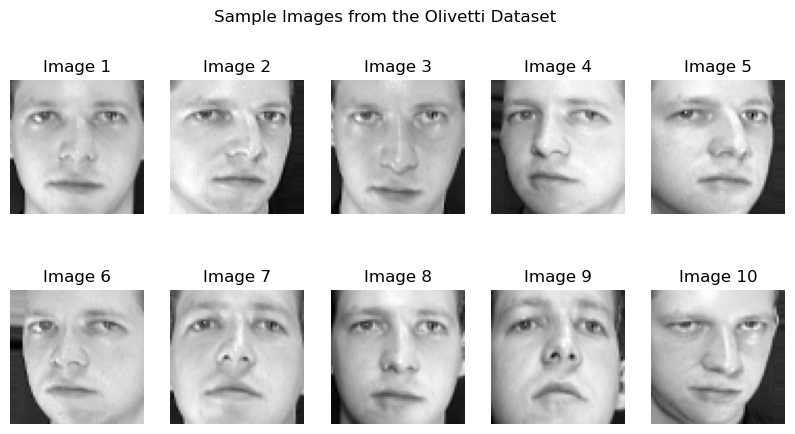

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Flatten the images to create a (400, 4096) dataset
n_samples, height, width = olivetti_faces.shape
X = olivetti_faces.reshape((n_samples, height * width))

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display a few original images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(olivetti_faces[i], cmap=plt.cm.gray)
    plt.title(f"Image {i + 1}")
    plt.axis('off')
plt.suptitle("Sample Images from the Olivetti Dataset")
plt.show()


# PCA Implementation Using Sklearn:

Apply PCA to reduce the dimensionality of the dataset.
Visualize the principal components (Eigenfaces).


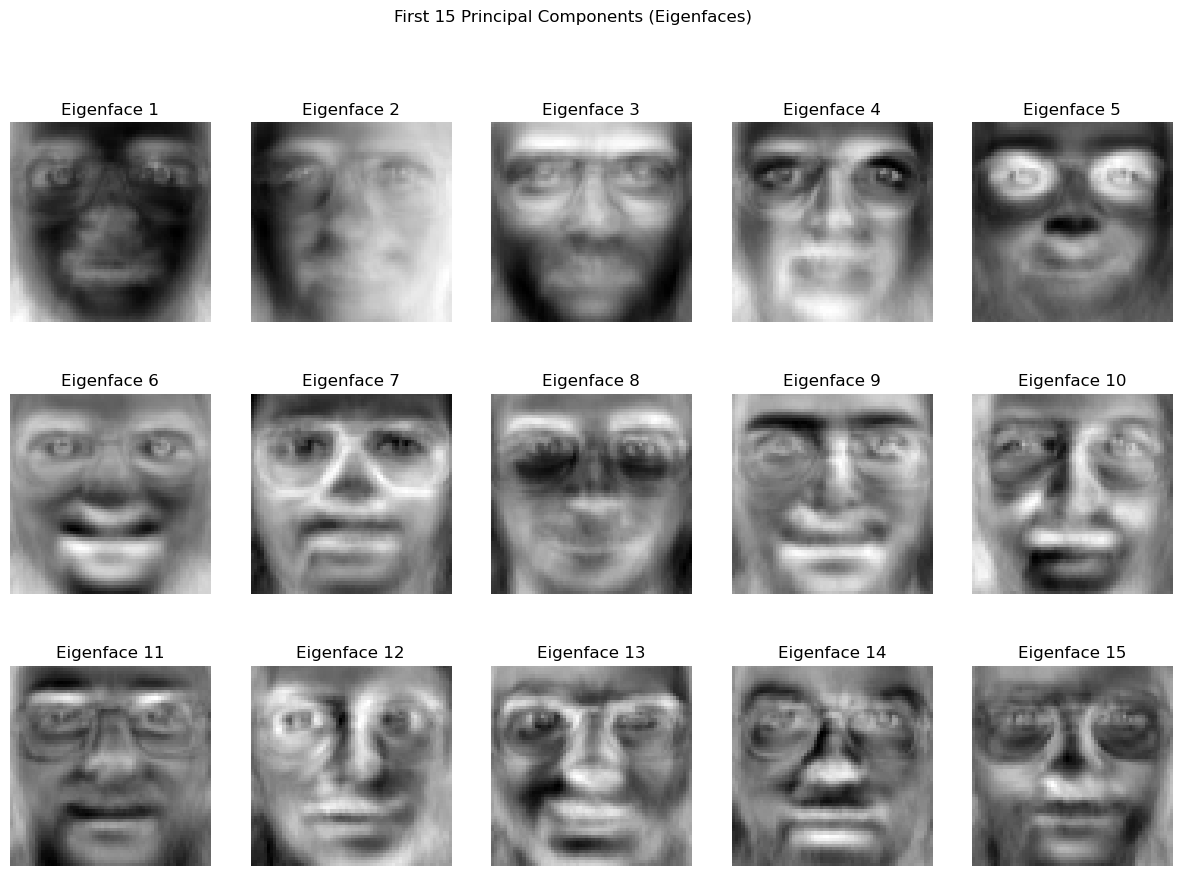

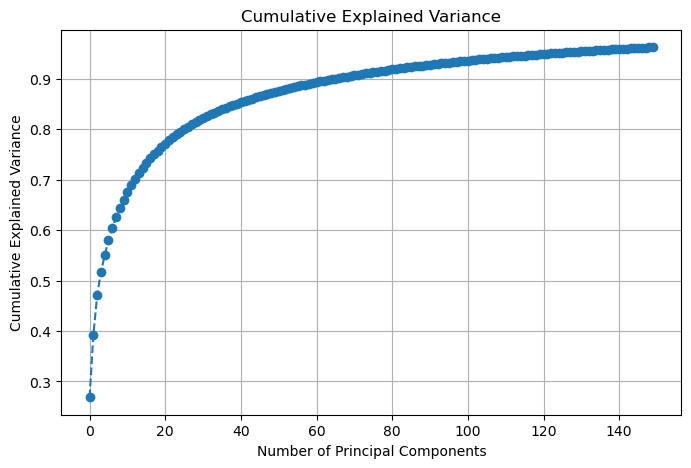

In [ ]:
import matplotlib.pyplot as plt
# Apply PCA with 150 components
n_components = 150
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first few principal components (Eigenfaces)
eigenfaces = pca.components_.reshape((n_components, height, width))

plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
    plt.title(f"Eigenface {i + 1}")
    plt.axis('off')
plt.suptitle("First 15 Principal Components (Eigenfaces)")
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


# Reconstruction of Images:

Reconstruct images using a reduced number of components.
Compare reconstructed images with original ones to assess information loss.

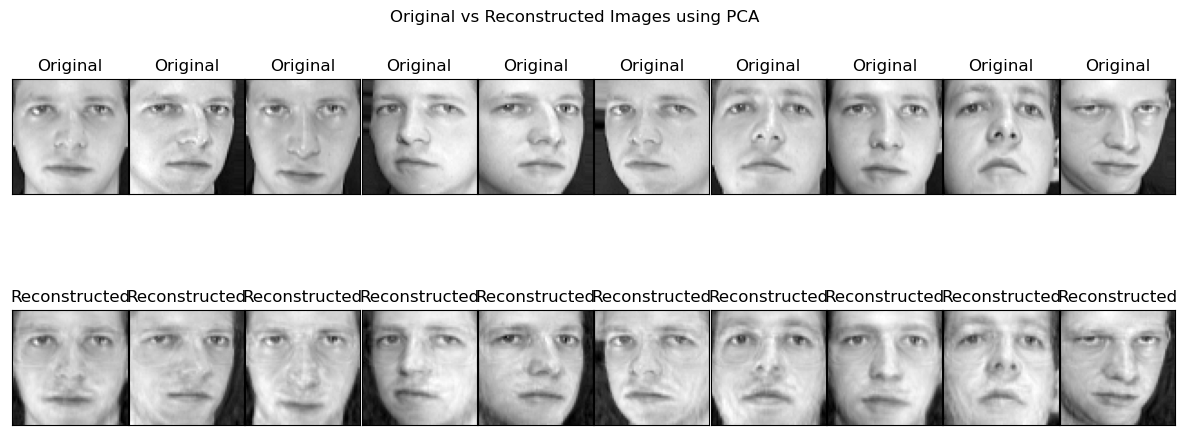

In [ ]:
import matplotlib.pyplot as plt

# Reconstruct some images using the principal components
X_reconstructed = pca.inverse_transform(X_pca)

# Display original and reconstructed images side by side
fig, axes = plt.subplots(2, 10, figsize=(15, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.5, wspace=0.01))

for i in range(10):
    # Original images
    axes[0, i].imshow(olivetti_faces[i], cmap=plt.cm.gray)
    axes[0, i].set_title('Original')

    # Reconstructed images
    # Reshape the 1D array to 2D before inverse transforming
    reconstructed_image = scaler.inverse_transform(X_reconstructed[i].reshape(1, -1)).reshape((height, width))
    axes[1, i].imshow(reconstructed_image, cmap=plt.cm.gray)
    axes[1, i].set_title('Reconstructed')

plt.suptitle("Original vs Reconstructed Images using PCA")
plt.show()


/tmp/ipykernel_10094/3274848904.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to prevent overlap


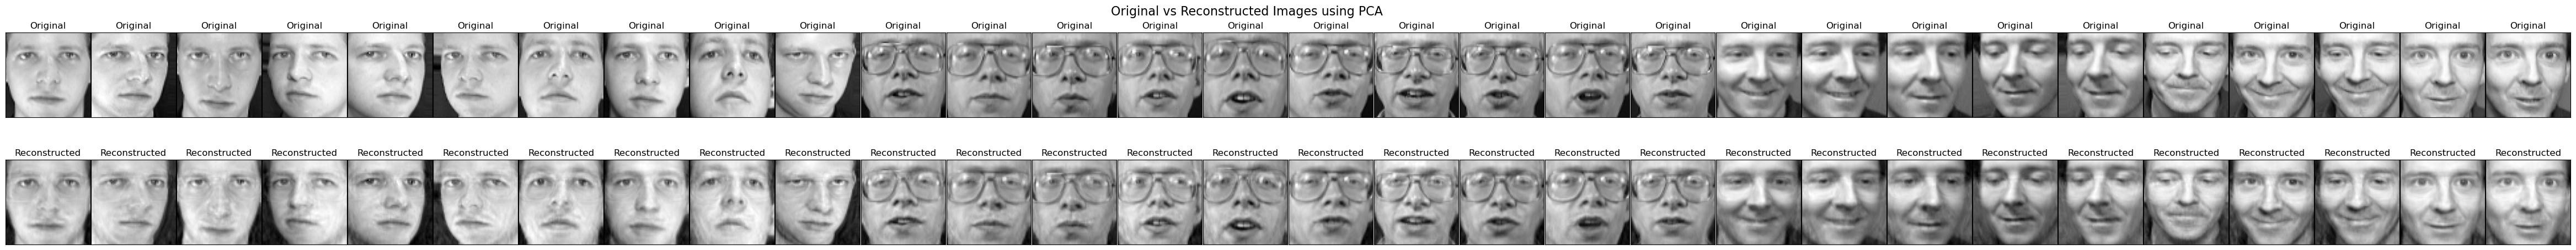

In [ ]:
# Number of images to display
num_images = 30

# Display original and reconstructed images side by side
fig, axes = plt.subplots(2, num_images, figsize=(2 * num_images, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.5, wspace=0.01))

for i in range(num_images):
    # Original images
    axes[0, i].imshow(olivetti_faces[i], cmap=plt.cm.gray)
    axes[0, i].set_title('Original')

    # Reshape the reconstructed data to 2D before inverse transforming
    reconstructed_image_2d = X_reconstructed[i].reshape(1, -1)  # 1 row, all columns
    # Apply inverse transform and reshape to original image dimensions
    reconstructed_image = scaler.inverse_transform(reconstructed_image_2d).reshape((height, width))
    # Display the reconstructed image
    axes[1, i].imshow(reconstructed_image, cmap=plt.cm.gray)
    axes[1, i].set_title('Reconstructed')

plt.suptitle("Original vs Reconstructed Images using PCA", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Trained Model:

Save the PCA model and demonstrate its use on new images.


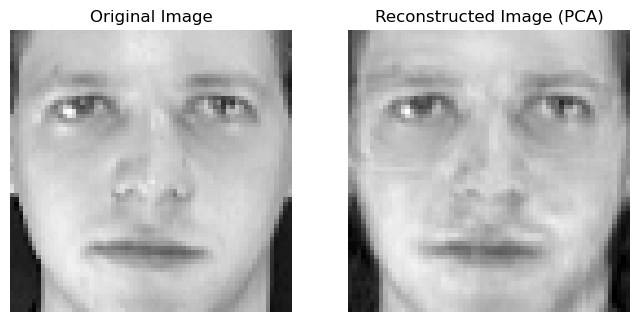

In [ ]:
import joblib

# Save the trained PCA model
model_path = '/home/mbust4/Downloads/olivetti_faces.npy'
joblib.dump(pca, model_path)

# Load and use the saved model for future use
loaded_pca = joblib.load(model_path)

# Transform a new image (for demonstration, we'll use an existing image)
sample_image = X_scaled[0].reshape(1, -1)  # Reshape for single sample
projected_image = loaded_pca.transform(sample_image)

# Reconstruct the image using loaded PCA model
reconstructed_sample = loaded_pca.inverse_transform(projected_image)
reconstructed_sample_image = scaler.inverse_transform(reconstructed_sample).reshape((height, width))

# Display the original and reconstructed image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(olivetti_faces[0], cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_sample_image, cmap=plt.cm.gray)
plt.title("Reconstructed Image (PCA)")
plt.axis('off')
plt.show()


/tmp/ipykernel_10094/3220836407.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to prevent overlap


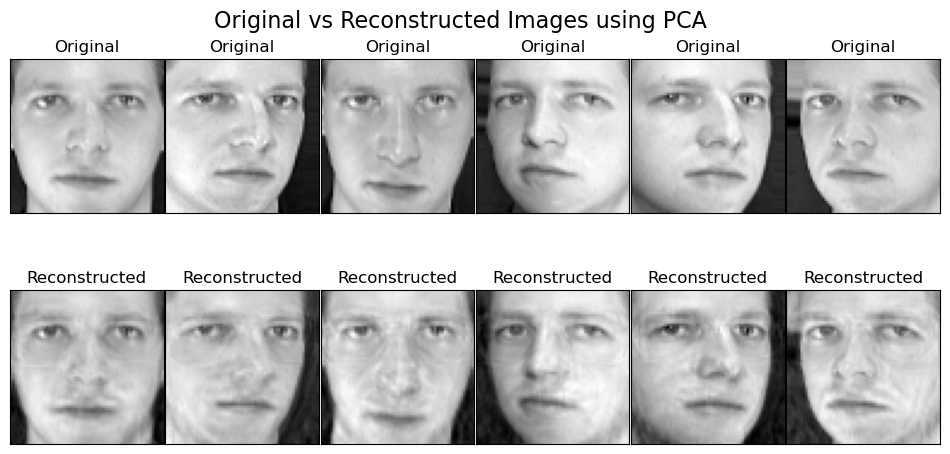

In [ ]:
import joblib
import matplotlib.pyplot as plt

# Save the trained PCA model
model_path = '/home/mbust4/Downloads/olivetti_faces.npy'
joblib.dump(pca, model_path)

# Load and use the saved model for future use
loaded_pca = joblib.load(model_path)

# Number of samples to display
num_samples = 6

# Display the original and reconstructed images side-by-side
fig, axes = plt.subplots(2, num_samples, figsize=(2 * num_samples, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.5, wspace=0.01))

for i in range(num_samples):
    # Original image
    original_image = olivetti_faces[i]
    axes[0, i].imshow(original_image, cmap=plt.cm.gray)
    axes[0, i].set_title('Original')

    # Transform and reconstruct the image using the loaded PCA model
    sample_image = X_scaled[i].reshape(1, -1)  # Reshape for single sample
    projected_image = loaded_pca.transform(sample_image)
    reconstructed_sample = loaded_pca.inverse_transform(projected_image)
    reconstructed_sample_image = scaler.inverse_transform(reconstructed_sample).reshape((height, width))

    # Reconstructed image
    axes[1, i].imshow(reconstructed_sample_image, cmap=plt.cm.gray)
    axes[1, i].set_title('Reconstructed')

plt.suptitle("Original vs Reconstructed Images using PCA", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
